In [1]:
import pandas as pd
import re
pd.set_option('display.max_columns', None)

In [17]:
log = open("/home/lizhaochen/fyp/fyp-long-tail-recognition/logs/CIFAR10_LT/e200_cal_knn_0.01/log.txt", "r")

In [18]:
lines = log.readlines()[10:]

In [19]:
len(lines)

3185

In [20]:
df = pd.DataFrame()
epoch = 0
dot_product_flag = True
num = 0
for i in range(len(lines)):
    if 'Evaluation_accuracy_micro_top1' in lines[i]:
        num += 1
        if num%2 == 1:
            dot_product_flag = True
        else:
            dot_product_flag = False
        if dot_product_flag == True:
            df.loc[epoch, 'overall_accuracy_dp'] = float(lines[i].split()[-1])
            df.loc[epoch, 'overall_accuracy_topk_dp']  = float(lines[i+1].split()[-1])
            cls_acc = lines[i+3]
            df.loc[epoch, 'many_dp'] = float(re.split('[()]',cls_acc.split()[1])[0])
            df.loc[epoch, 'many_topk_dp'] = float(re.split('[()]',cls_acc.split()[1])[1])
            df.loc[epoch, 'median_dp'] = float(re.split('[()]',cls_acc.split()[3])[0])
            df.loc[epoch, 'median_topk_dp'] = float(re.split('[()]',cls_acc.split()[3])[1])
            df.loc[epoch, 'low_dp'] = float(re.split('[()]',cls_acc.split()[5])[0])
            df.loc[epoch, 'low_topk_dp'] = float(re.split('[()]',cls_acc.split()[5])[1])
        else:
            df.loc[epoch, 'overall_accuracy_knn'] = float(lines[i].split()[-1])
            df.loc[epoch, 'overall_accuracy_topk_knn']  = float(lines[i+1].split()[-1])
            cls_acc = lines[i+3]
            df.loc[epoch, 'many_knn'] = float(re.split('[()]',cls_acc.split()[1])[0])
            df.loc[epoch, 'many_topk_knn'] = float(re.split('[()]',cls_acc.split()[1])[1])
            df.loc[epoch, 'median_knn'] = float(re.split('[()]',cls_acc.split()[3])[0])
            df.loc[epoch, 'median_topk_knn'] = float(re.split('[()]',cls_acc.split()[3])[1])
            df.loc[epoch, 'low_knn'] = float(re.split('[()]',cls_acc.split()[5])[0])
            df.loc[epoch, 'low_topk_knn'] = float(re.split('[()]',cls_acc.split()[5])[1])
        if dot_product_flag == False:
            epoch += 1
    

In [21]:
df.columns

Index(['overall_accuracy_dp', 'overall_accuracy_topk_dp', 'many_dp',
       'many_topk_dp', 'median_dp', 'median_topk_dp', 'low_dp', 'low_topk_dp',
       'overall_accuracy_knn', 'overall_accuracy_topk_knn', 'many_knn',
       'many_topk_knn', 'median_knn', 'median_topk_knn', 'low_knn',
       'low_topk_knn'],
      dtype='object')

In [22]:
df

,overall_accuracy_dp,overall_accuracy_topk_dp,many_dp,many_topk_dp,median_dp,median_topk_dp,low_dp,low_topk_dp,overall_accuracy_knn,overall_accuracy_topk_knn,many_knn,many_topk_knn,median_knn,median_topk_knn,low_knn,low_topk_knn
0,0.271,0.763,0.339,0.805,0.000,0.597,NaN,NaN,0.323,0.864,0.342,0.854,0.247,0.907,NaN,NaN
1,0.268,0.742,0.335,0.837,0.000,0.362,NaN,NaN,0.270,0.845,0.267,0.861,0.282,0.778,NaN,NaN
2,0.270,0.766,0.337,0.853,0.000,0.418,NaN,NaN,0.280,0.863,0.296,0.878,0.215,0.801,NaN,NaN
3,0.278,0.792,0.347,0.840,0.000,0.603,NaN,NaN,0.358,0.899,0.401,0.893,0.186,0.924,NaN,NaN
4,0.304,0.800,0.380,0.828,0.000,0.691,NaN,NaN,0.376,0.899,0.403,0.888,0.270,0.943,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0.716,0.979,0.786,0.982,0.434,0.969,NaN,NaN,0.787,0.980,0.810,0.984,0.699,0.965,NaN,NaN
195,0.712,0.978,0.786,0.982,0.418,0.966,NaN,NaN,0.785,0.982,0.809,0.986,0.686,0.965,NaN,NaN
196,0.712,0.979,0.782,0.982,0.432,0.968,NaN,NaN,0.784,0.980,0.806,0.984,0.694,0.966,NaN,NaN
197,0.717,0.979,0.784,0.982,0.451,0.970,NaN,NaN,0.790,0.980,0.808,0.983,0.716,0.968,NaN,NaN


In [23]:
df.index += 2

<AxesSubplot:>

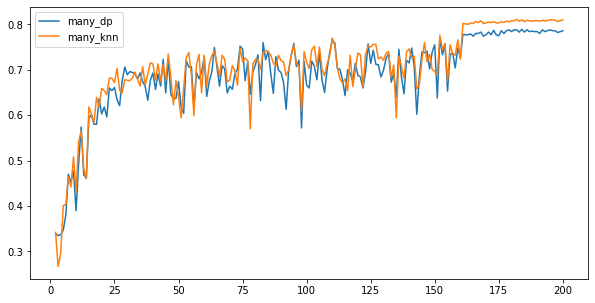

In [24]:
df[['many_dp', 'many_knn']].plot(figsize=(10,5))

<AxesSubplot:>

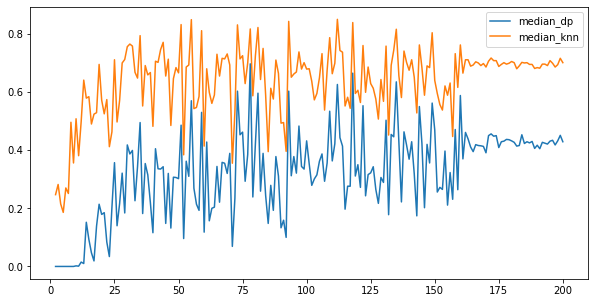

In [25]:
df[['median_dp', 'median_knn']].plot(figsize=(10,5))

<AxesSubplot:>

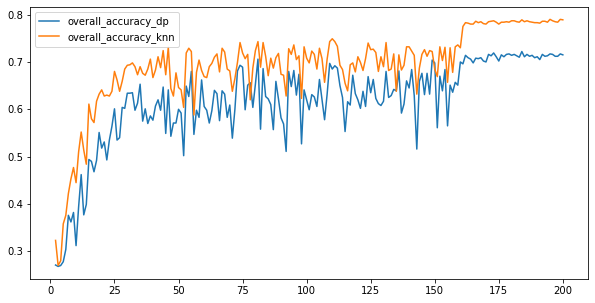

In [27]:
df[['overall_accuracy_dp', 'overall_accuracy_knn']].plot(figsize=(10,5))

In [30]:
float(line.split()[-1])

0.028

In [56]:
lines[i+3]

' Many_shot_accuracy_top1: 0.071(0.216) Median_shot_accuracy_top1: 0.001(0.016) Low_shot_accuracy_top1: 0.000(0.000) \n'

In [60]:
re.split('[()]',lines[i+3].split()[3])[]

['0.001', '0.016', '']